In [670]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None) #always show all the columns. Normally pandas have a max limit.
pd.set_option('display.max_rows', None) #for rows

In [671]:
fifa = pd.read_csv('./fifa21_train.csv') ##Read the file into python as a dataframe

In [672]:
fifa.shape

(11701, 101)

In [673]:
print(list(fifa.columns))

['ID', 'Name', 'Age', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract', 'Height', 'Weight', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB'

In [674]:
#W/F weak foot rating: 
    #The Weak Foot Skill measures the ability of a player to shoot with one foot as he does with his preferred foot.
    #All players have a preferred foot. Having a 5-star weak foot rating means that a player's weaker foot shot is
    #identical to their preferred foot shot.   
#SM: Skill moves
#IR: international  reputation:

fifa.head()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


## Data Preparation

In [675]:
fifa = fifa.drop(['ID', 'Name', 'Nationality', 'Club', 'Position', 'Team & Contract', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'A/W', 'D/W', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK'], axis=1)
fifa.shape

(11701, 10)

In [676]:
fifa.head()

,Age,BP,Height,Weight,Total Stats,Base Stats,W/F,SM,IR,OVA
0,26,CM,"5'9""",161lbs,1682,357,4 ★,2★,1 ★,64
1,30,ST,"6'0""",159lbs,1961,412,3 ★,4★,2 ★,77
2,33,CAM,"5'4""",134lbs,1925,404,4 ★,4★,2 ★,80
3,22,CDM,"5'10""",152lbs,1527,329,2 ★,2★,1 ★,59
4,23,CDM,"5'11""",150lbs,1664,360,2 ★,3★,1 ★,65


In [677]:
cols = [] 
for i in range(len(fifa.columns)):
    cols.append(fifa.columns[i].lower().replace(' ','_')) #making all columns lowercase and #replacing the spaces with underscores
fifa.columns = cols

fifa=fifa.rename(columns={
'bp':'base_position',
'w/f':'weak_foot',
'sm':'skill_moves',
'ir':'international_reputation',
'ova':'overall_rating'
})
fifa.head()

,age,base_position,height,weight,total_stats,base_stats,weak_foot,skill_moves,international_reputation,overall_rating
0,26,CM,"5'9""",161lbs,1682,357,4 ★,2★,1 ★,64
1,30,ST,"6'0""",159lbs,1961,412,3 ★,4★,2 ★,77
2,33,CAM,"5'4""",134lbs,1925,404,4 ★,4★,2 ★,80
3,22,CDM,"5'10""",152lbs,1527,329,2 ★,2★,1 ★,59
4,23,CDM,"5'11""",150lbs,1664,360,2 ★,3★,1 ★,65


In [678]:
fifa.dtypes #height, weight, weak foot, skill moves, ir

age                          int64
base_position               object
height                      object
weight                      object
total_stats                  int64
base_stats                   int64
weak_foot                   object
skill_moves                 object
international_reputation    object
overall_rating               int64
dtype: object

In [679]:
fifa.isna().sum()

age                         0
base_position               0
height                      0
weight                      0
total_stats                 0
base_stats                  0
weak_foot                   0
skill_moves                 0
international_reputation    0
overall_rating              0
dtype: int64

In [680]:
fifa['base_position'].unique() 

array(['CM', 'ST', 'CAM', 'CDM', 'LM', 'RB', 'CB', 'RM', 'GK', 'LB', 'RW',
       'LWB', 'LW', 'RWB', 'CF'], dtype=object)

In [681]:
fifa['base_position']= fifa['base_position'].replace({'CM':'Midfielder', 'CAM':'Midfielder','CDM':'Midfielder', 'LM':'Midfielder',
                                                 'RM':'Midfielder', 'ST':'Striker', 'RB':'Back', 'CB':'Back', 'LB':'Back',
                                                 'LWB':'Back', 'RWB':'Back', 'LW':'Wing', 'RW':'Wing', 'CF':'Forward',
                                                  'GK':'Goalkeeper' }) #you can substitute map with replace here.   
fifa.head()

,age,base_position,height,weight,total_stats,base_stats,weak_foot,skill_moves,international_reputation,overall_rating
0,26,Midfielder,"5'9""",161lbs,1682,357,4 ★,2★,1 ★,64
1,30,Striker,"6'0""",159lbs,1961,412,3 ★,4★,2 ★,77
2,33,Midfielder,"5'4""",134lbs,1925,404,4 ★,4★,2 ★,80
3,22,Midfielder,"5'10""",152lbs,1527,329,2 ★,2★,1 ★,59
4,23,Midfielder,"5'11""",150lbs,1664,360,2 ★,3★,1 ★,65


In [682]:
def change_height_feetinch_to_cm(height):
    feet = int(height.split("'")[0])
    inch = int(height.split("'")[1][:-1])
    result = ((feet * 30.48) + (inch * 2.54))
    result=round(result,0)
    return result

fifa['height'] = fifa['height'].apply(lambda x: change_height_feetinch_to_cm(x))
fifa['weight'] = fifa['weight'].map(lambda x: x.rstrip('lbs'))
fifa['weight'] = pd.to_numeric(fifa['weight'], errors='coerce')
fifa['weak_foot'] = fifa['weak_foot'].str.replace('★','')
fifa['weak_foot'] = pd.to_numeric(fifa['weak_foot'], errors='coerce')
fifa['skill_moves'] = fifa['skill_moves'].str.replace('★','')
fifa['skill_moves'] = pd.to_numeric(fifa['skill_moves'], errors='coerce')
fifa['international_reputation'] = fifa['international_reputation'].str.replace('★','')
fifa['international_reputation'] = pd.to_numeric(fifa['international_reputation'], errors='coerce')
fifa.head()

,age,base_position,height,weight,total_stats,base_stats,weak_foot,skill_moves,international_reputation,overall_rating
0,26,Midfielder,175.0,161,1682,357,4,2,1,64
1,30,Striker,183.0,159,1961,412,3,4,2,77
2,33,Midfielder,163.0,134,1925,404,4,4,2,80
3,22,Midfielder,178.0,152,1527,329,2,2,1,59
4,23,Midfielder,180.0,150,1664,360,2,3,1,65


In [683]:
fifa.dtypes

age                           int64
base_position                object
height                      float64
weight                        int64
total_stats                   int64
base_stats                    int64
weak_foot                     int64
skill_moves                   int64
international_reputation      int64
overall_rating                int64
dtype: object

## Separate the num and cat

In [684]:
numerical=fifa.select_dtypes(np.number)
categoricals=fifa.select_dtypes(object)

## Check for normality of the numerical features

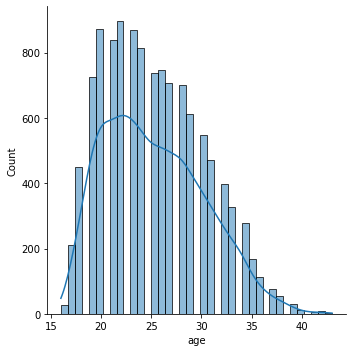

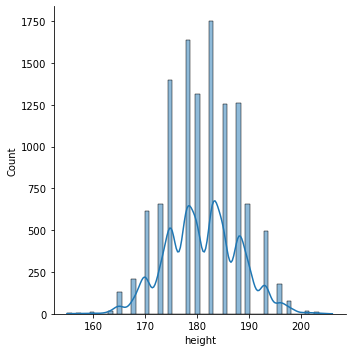

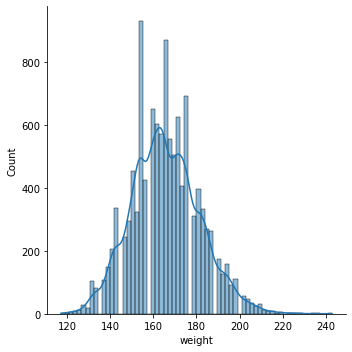

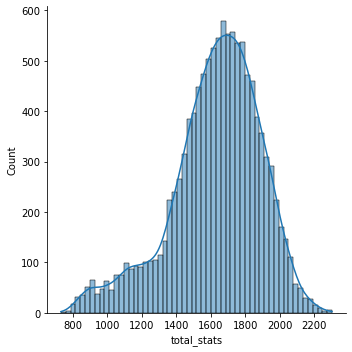

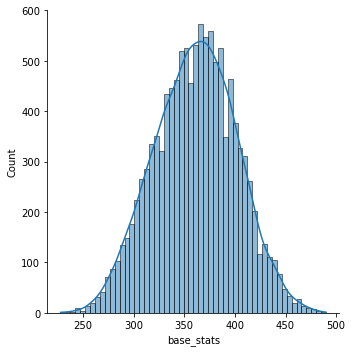

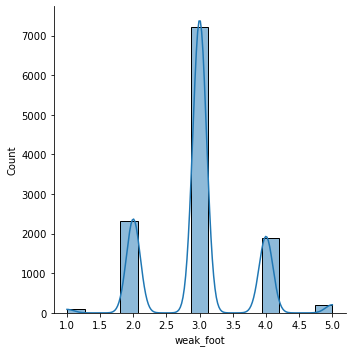

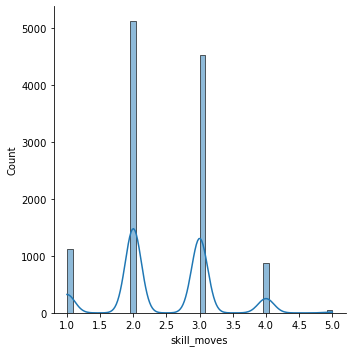

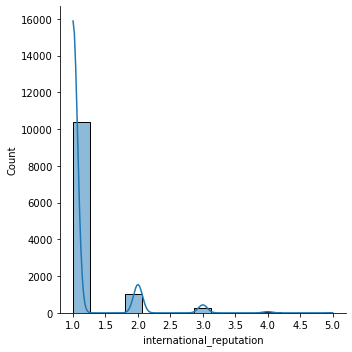

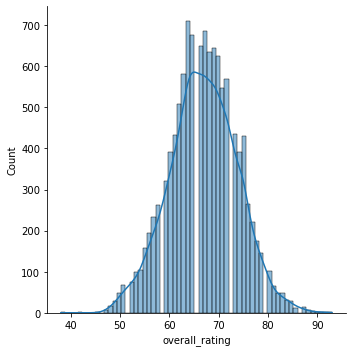

In [685]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns  #another gyraphic library
%matplotlib inline

for column in numerical.columns: #great way to run all column plots at once
    sns.displot(numerical[column], kde=True)
    plt.show()

# Check the multicollinearity between the features


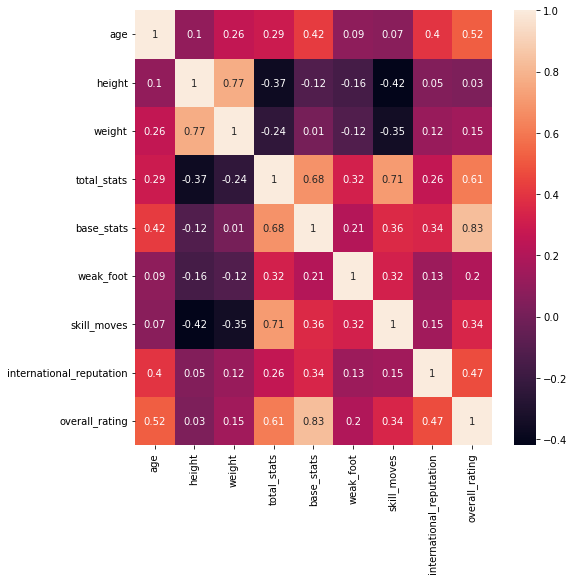

In [686]:
fig, ax = plt.subplots(figsize=(8,8)) #First we have to use plt.subplots to create plot environment.
ax=sns.heatmap(round(numerical.corr(),2), annot=True)
plt.show()

# X-y split

In [687]:
y = fifa['overall_rating'] # lowercase y: target feature 
X = fifa.drop(['overall_rating'], axis=1) # UPPERCASE X: predictors

print(y.shape, X.shape)

(11701,) (11701, 9)


# Normalize (numerical)

In [688]:
#separating the num and cat
X_num=X.select_dtypes(np.number)
X_cat=X.select_dtypes(object)
X_num.head()

,age,height,weight,total_stats,base_stats,weak_foot,skill_moves,international_reputation
0,26,175.0,161,1682,357,4,2,1
1,30,183.0,159,1961,412,3,4,2
2,33,163.0,134,1925,404,4,4,2
3,22,178.0,152,1527,329,2,2,1
4,23,180.0,150,1664,360,2,3,1


In [689]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_num)
X_normalized = transformer.transform(X_num) #X_normalized here is not in the form of a df.
X_normalized=pd.DataFrame(X_normalized, columns=X_num.columns) #making it a df
X_normalized.head()

,age,height,weight,total_stats,base_stats,weak_foot,skill_moves,international_reputation
0,0.370370,0.392157,0.349206,0.604577,0.492366,0.75,0.25,0.00
1,0.518519,0.549020,0.333333,0.781945,0.702290,0.50,0.75,0.25
2,0.629630,0.156863,0.134921,0.759059,0.671756,0.75,0.75,0.25
3,0.222222,0.450980,0.277778,0.506039,0.385496,0.25,0.25,0.00
4,0.259259,0.490196,0.261905,0.593134,0.503817,0.25,0.50,0.00


In [690]:
print(X_normalized.shape)

(11701, 8)


# One Hot/Label Encoding (categorical)

In [691]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_cat)
cols=encoder.get_feature_names(input_features=X_cat.columns)
encoded = encoder.transform(X_cat).toarray() #we want to transform the X_cut and make it an array
onehot_encoded = pd.DataFrame(encoded,columns=cols) #make it a df
onehot_encoded.head(20)
#onehot_encoded.shape

/Users/elifyildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,base_position_Forward,base_position_Goalkeeper,base_position_Midfielder,base_position_Striker,base_position_Wing
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0


# Dataframes will be concatenated

In [692]:
print(X_normalized.shape, onehot_encoded.shape) #the two have the same number of rows

(11701, 8) (11701, 5)


In [693]:
X = pd.concat([X_normalized, onehot_encoded], axis=1) #All the features are concat.ed
X.shape

(11701, 13)

# Linear Regression

# Train-test split

In [694]:
y.head()

0    64
1    77
2    80
3    59
4    65
Name: overall_rating, dtype: int64

In [695]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9360, 13)
(2341, 13)
(9360,)
(2341,)


In [696]:
X_train.head()

,age,height,weight,total_stats,base_stats,weak_foot,skill_moves,international_reputation,base_position_Forward,base_position_Goalkeeper,base_position_Midfielder,base_position_Striker,base_position_Wing
1775,0.148148,0.549020,0.380952,0.462174,0.305344,0.50,0.25,0.00,0.0,0.0,0.0,1.0,0.0
2455,0.444444,0.588235,0.468254,0.619835,0.431298,0.50,0.25,0.00,0.0,0.0,0.0,1.0,0.0
93,0.629630,0.549020,0.380952,0.575969,0.412214,0.50,0.25,0.25,0.0,0.0,0.0,0.0,0.0
8952,0.111111,0.549020,0.468254,0.461538,0.335878,0.50,0.25,0.00,0.0,0.0,1.0,0.0,0.0
7810,0.518519,0.490196,0.420635,0.868404,0.812977,0.75,0.75,0.25,0.0,0.0,0.0,1.0,0.0


In [697]:
y_train.head()

1775    62
2455    74
93      69
8952    55
7810    79
Name: overall_rating, dtype: int64

# Apply linear regression

In [698]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7901340766803813

In [699]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7988585998466881

In [700]:
y_test[:10]

2405     49
8025     70
10025    62
10933    72
1402     64
8944     74
2727     69
1595     60
3247     61
2751     70
Name: overall_rating, dtype: int64

In [701]:
predictions_test[:10]

array([53.37015624, 67.42432681, 66.92001941, 72.21157593, 67.87277055,
       70.56669213, 73.45492867, 60.98840747, 64.83887363, 76.73965467])

# Model Validation

In [702]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

9.524156090024798

In [703]:
from sklearn.metrics import mean_absolute_error, r2_score
import math
mae = mean_absolute_error(y_test, predictions_test)
print(mae)
rmse = math.sqrt(mse)
print(rmse)
r2_train = r2_score(y_train, predictions)
print(r2_train)
r2_test = r2_score(y_test, predictions_test)
print(r2_test)

2.4447895443843266
3.08612314887543
0.7901340766803813
0.7988585998466881


# Writing a function for the model

In [704]:
fifa = pd.read_csv('./fifa21_train.csv')

In [705]:
def linear_regr(df):
    
    ## DATA PREPARATION   
    df = df.drop(['ID', 'Name', 'Nationality', 'Club', 'Position', 'Team & Contract', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'A/W', 'D/W', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK'], axis=1)
    cols = [] 
    for i in range(len(df.columns)):
        cols.append(df.columns[i].lower().replace(' ','_')) #making all columns lowercase and #replacing the spaces with underscores
    df.columns = cols

    df=df.rename(columns={
    'bp':'base_position',
    'w/f':'weak_foot',
    'sm':'skill_moves',
    'ir':'international_reputation',
    'ova':'overall_rating'
    })
    
    df['base_position']= df['base_position'].replace({'CM':'Midfielder', 'CAM':'Midfielder','CDM':'Midfielder', 'LM':'Midfielder',
                                                 'RM':'Midfielder', 'ST':'Striker', 'RB':'Back', 'CB':'Back', 'LB':'Back',
                                                 'LWB':'Back', 'RWB':'Back', 'LW':'Wing', 'RW':'Wing', 'CF':'Forward',
                                                  'GK':'Goalkeeper' }) #you can substitute map with replace here.   

    def change_height_feetinch_to_cm(height):
        feet = int(height.split("'")[0])
        inch = int(height.split("'")[1][:-1])
        result = ((feet * 30.48) + (inch * 2.54))
        result=round(result,0)
        return result

    df['height'] = df['height'].apply(lambda x: change_height_feetinch_to_cm(x))
    df['weight'] = df['weight'].map(lambda x: x.rstrip('lbs'))
    df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
    df['weak_foot'] = df['weak_foot'].str.replace('★','')
    df['weak_foot'] = pd.to_numeric(df['weak_foot'], errors='coerce')
    df['skill_moves'] = df['skill_moves'].str.replace('★','')
    df['skill_moves'] = pd.to_numeric(df['skill_moves'], errors='coerce')
    df['international_reputation'] = df['international_reputation'].str.replace('★','')
    df['international_reputation'] = pd.to_numeric(df['international_reputation'], errors='coerce')
    
    ## X-y split    
    y = df['overall_rating'] # lowercase y: target feature 
    X = df.drop(['overall_rating'], axis=1) # UPPERCASE X: predictors

    ## Separating the numerical and categorical columns in df X    
    X_num=X.select_dtypes(np.number)
    X_cat=X.select_dtypes(object)
    
    ## Normalizing X_num
    from sklearn.preprocessing import MinMaxScaler
    transformer = MinMaxScaler().fit(X_num)
    X_normalized = transformer.transform(X_num) #X_normalized here is not in the form of a df.
    X_normalized=pd.DataFrame(X_normalized, columns=X_num.columns) #making it a df
    
    ## One-hot encoding
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder(drop='first').fit(X_cat)
    cols=encoder.get_feature_names_out(input_features=X_cat.columns)
    encoded = encoder.transform(X_cat).toarray() #we want to transform the X_cut and make it an array
    onehot_encoded = pd.DataFrame(encoded,columns=cols) #make it a df
    
    ##Concatanation before model building
    X = pd.concat([X_normalized, onehot_encoded], axis=1) #All the features are concat.ed
    
    ##Linear Regression
    
    #Train-test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #Apply linear regression
    lm = linear_model.LinearRegression()
    lm.fit(X_train,y_train)
    from sklearn.metrics import r2_score
    predictions = lm.predict(X_train)
    r2_score(y_train, predictions)
    predictions_test = lm.predict(X_test) #the new data is going to be used here to test! 
    r2_score(y_test, predictions_test)
    print('Actual overall rating: ')
    print(y_test[:10])
    print('')
    print('Predicted overall rating:')
    print(predictions_test[:10])
    
    #Validation
    from sklearn.metrics import mean_squared_error
    mse=mean_squared_error(y_test,predictions_test)
    mae = mean_absolute_error(y_test, predictions_test)
    rmse = math.sqrt(mse)
    r2_train = r2_score(y_train, predictions)
    r2_test = r2_score(y_test, predictions_test)

    print('')
    print('Linear regression model validation metrics:')
    print('Mean squared error: ', mse)
    print('Mean absolute error:', mae)
    print('Root mean squared error:', rmse)
    print('train r2:', r2_train)
    print('test r2:', r2_test)
    

In [706]:
linear_regr(fifa)

Actual overall rating: 
2405     49
8025     70
10025    62
10933    72
1402     64
8944     74
2727     69
1595     60
3247     61
2751     70
Name: overall_rating, dtype: int64

Predicted overall rating:
[53.37015624 67.42432681 66.92001941 72.21157593 67.87277055 70.56669213
 73.45492867 60.98840747 64.83887363 76.73965467]

Linear regression model validation metrics:
Mean squared error:  9.524156090024798
Mean absolute error: 2.4447895443843266
Root mean squared error: 3.08612314887543
train r2: 0.7901340766803813
test r2: 0.7988585998466881


# Building a model WITHOUT THE HEIGHT feature


In [707]:
fifa = pd.read_csv('./fifa21_train.csv')

In [708]:
def linear_regr_no_height(df):
    
    ## DATA PREPARATION   
    df = df.drop(['ID', 'Name', 'Nationality', 'Club', 'Position', 'Team & Contract','Height', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'A/W', 'D/W', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK'], axis=1)
    cols = [] 
    for i in range(len(df.columns)):
        cols.append(df.columns[i].lower().replace(' ','_')) #making all columns lowercase and #replacing the spaces with underscores
    df.columns = cols

    df=df.rename(columns={
    'bp':'base_position',
    'w/f':'weak_foot',
    'sm':'skill_moves',
    'ir':'international_reputation',
    'ova':'overall_rating'
    })
    
    df['base_position']= df['base_position'].replace({'CM':'Midfielder', 'CAM':'Midfielder','CDM':'Midfielder', 'LM':'Midfielder',
                                                 'RM':'Midfielder', 'ST':'Striker', 'RB':'Back', 'CB':'Back', 'LB':'Back',
                                                 'LWB':'Back', 'RWB':'Back', 'LW':'Wing', 'RW':'Wing', 'CF':'Forward',
                                                  'GK':'Goalkeeper' }) #you can substitute map with replace here.   

#     def change_height_feetinch_to_cm(height):
#         feet = int(height.split("'")[0])
#         inch = int(height.split("'")[1][:-1])
#         result = ((feet * 30.48) + (inch * 2.54))
#         result=round(result,0)
#         return result

#     df['height'] = df['height'].apply(lambda x: change_height_feetinch_to_cm(x))
    df['weight'] = df['weight'].map(lambda x: x.rstrip('lbs'))
    df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
    df['weak_foot'] = df['weak_foot'].str.replace('★','')
    df['weak_foot'] = pd.to_numeric(df['weak_foot'], errors='coerce')
    df['skill_moves'] = df['skill_moves'].str.replace('★','')
    df['skill_moves'] = pd.to_numeric(df['skill_moves'], errors='coerce')
    df['international_reputation'] = df['international_reputation'].str.replace('★','')
    df['international_reputation'] = pd.to_numeric(df['international_reputation'], errors='coerce')
    
    ## X-y split    
    y = df['overall_rating'] # lowercase y: target feature 
    X = df.drop(['overall_rating'], axis=1) # UPPERCASE X: predictors

    ## Separating the numerical and categorical columns in df X    
    X_num=X.select_dtypes(np.number)
    X_cat=X.select_dtypes(object)
    
    ## Normalizing X_num
    from sklearn.preprocessing import MinMaxScaler
    transformer = MinMaxScaler().fit(X_num)
    X_normalized = transformer.transform(X_num) #X_normalized here is not in the form of a df.
    X_normalized=pd.DataFrame(X_normalized, columns=X_num.columns) #making it a df
    
    ## One-hot encoding
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder(drop='first').fit(X_cat)
    cols=encoder.get_feature_names_out(input_features=X_cat.columns)
    encoded = encoder.transform(X_cat).toarray() #we want to transform the X_cut and make it an array
    onehot_encoded = pd.DataFrame(encoded,columns=cols) #make it a df
    
    ##Concatanation before model building
    X = pd.concat([X_normalized, onehot_encoded], axis=1) #All the features are concat.ed
    
    ##Linear Regression
    
    #Train-test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #Apply linear regression
    lm = linear_model.LinearRegression()
    lm.fit(X_train,y_train)
    from sklearn.metrics import r2_score
    predictions = lm.predict(X_train)
    r2_score(y_train, predictions)
    predictions_test = lm.predict(X_test) #the new data is going to be used here to test! 
    r2_score(y_test, predictions_test)
    print('Actual overall rating: ')
    print(y_test[:10])
    print('')
    print('Predicted overall rating:')
    print(predictions_test[:10])
    
    #Validation
    from sklearn.metrics import mean_squared_error
    mse=mean_squared_error(y_test,predictions_test)
    mae = mean_absolute_error(y_test, predictions_test)
    rmse = math.sqrt(mse)
    r2_train = r2_score(y_train, predictions)
    r2_test = r2_score(y_test, predictions_test)

    print('')
    print('Linear regression model validation metrics:')
    print('Mean squared error: ', mse)
    print('Mean absolute error:', mae)
    print('Root mean squared error:', rmse)
    print('train r2:', r2_train)
    print('test r2:', r2_test)
    

In [709]:
linear_regr_no_height(fifa)

Actual overall rating: 
2405     49
8025     70
10025    62
10933    72
1402     64
8944     74
2727     69
1595     60
3247     61
2751     70
Name: overall_rating, dtype: int64

Predicted overall rating:
[53.70373076 67.5847208  66.98788228 72.19483272 67.5884235  70.58606559
 73.16199369 60.93026306 64.84956882 77.02912279]

Linear regression model validation metrics:
Mean squared error:  9.595672529380284
Mean absolute error: 2.4535629538118227
Root mean squared error: 3.0976882556804006
train r2: 0.7884126959426476
test r2: 0.7973482385495849


# Building a model WITH THE HITS feature


In [710]:
fifa = pd.read_csv('./fifa21_train.csv')

In [711]:
fifa.isna().sum()

ID                      0
Name                    0
Age                     0
Nationality             0
Club                   18
BP                      0
Position              288
Team & Contract         0
Height                  0
Weight                  0
foot                    0
Growth                  0
Joined                 41
Loan Date End       11072
Value                   0
Wage                    0
Release Clause          0
Contract                0
Attacking               0
Crossing                0
Finishing               0
Heading Accuracy        0
Short Passing           0
Volleys                41
Skill                   0
Dribbling               0
Curve                  41
FK Accuracy             0
Long Passing            0
Ball Control            0
Movement                0
Acceleration            0
Sprint Speed            0
Agility                41
Reactions               0
Balance                41
Power                   0
Shot Power              0
Jumping     

In [712]:
#fifa['Hits'] = pd.to_numeric(fifa['Hits'], errors='coerce')
#len(fifa[fifa['Hits'].isna()==True])

In [713]:
#fifa.shape

In [714]:
def linear_regr_with_hits(df):
    
    print('Raw dataframe shape: ', df.shape) 
    
    ## DATA PREPARATION   
    df = df.drop(['ID', 'Name', 'Nationality', 'Club', 'Position', 'Team & Contract', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'A/W', 'D/W', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK'], axis=1)
    cols = [] 
    for i in range(len(df.columns)):
        cols.append(df.columns[i].lower().replace(' ','_')) #making all columns lowercase and #replacing the spaces with underscores
    df.columns = cols

    df=df.rename(columns={
    'bp':'base_position',
    'w/f':'weak_foot',
    'sm':'skill_moves',
    'ir':'international_reputation',
    'ova':'overall_rating'
    })
    
    df['base_position']= df['base_position'].replace({'CM':'Midfielder', 'CAM':'Midfielder','CDM':'Midfielder', 'LM':'Midfielder',
                                                 'RM':'Midfielder', 'ST':'Striker', 'RB':'Back', 'CB':'Back', 'LB':'Back',
                                                 'LWB':'Back', 'RWB':'Back', 'LW':'Wing', 'RW':'Wing', 'CF':'Forward',
                                                  'GK':'Goalkeeper' }) #you can substitute map with replace here.   

    def change_height_feetinch_to_cm(height):
        feet = int(height.split("'")[0])
        inch = int(height.split("'")[1][:-1])
        result = ((feet * 30.48) + (inch * 2.54))
        result=round(result,0)
        return result

    df['height'] = df['height'].apply(lambda x: change_height_feetinch_to_cm(x))
    df['weight'] = df['weight'].map(lambda x: x.rstrip('lbs'))
    df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
    df['weak_foot'] = df['weak_foot'].str.replace('★','')
    df['weak_foot'] = pd.to_numeric(df['weak_foot'], errors='coerce')
    df['skill_moves'] = df['skill_moves'].str.replace('★','')
    df['skill_moves'] = pd.to_numeric(df['skill_moves'], errors='coerce')
    df['international_reputation'] = df['international_reputation'].str.replace('★','')
    df['international_reputation'] = pd.to_numeric(df['international_reputation'], errors='coerce')
    df['hits'] = pd.to_numeric(df['hits'], errors='coerce')
    df = df.dropna()
    
    print('Cleaned dataframe shape: ', df.shape)
    
    ## X-y split    
    y = df['overall_rating'] # lowercase y: target feature 
    X = df.drop(['overall_rating'], axis=1) # UPPERCASE X: predictors

    ## Separating the numerical and categorical columns in df X    
    X_num=X.select_dtypes(np.number)
    X_cat=X.select_dtypes(object)
    
    ## Normalizing X_num
    from sklearn.preprocessing import MinMaxScaler
    transformer = MinMaxScaler().fit(X_num)
    X_normalized = transformer.transform(X_num) #X_normalized here is not in the form of a df.
    X_normalized=pd.DataFrame(X_normalized, columns=X_num.columns) #making it a df
    
    ## One-hot encoding
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder(drop='first').fit(X_cat)
    cols=encoder.get_feature_names_out(input_features=X_cat.columns)
    encoded = encoder.transform(X_cat).toarray() #we want to transform the X_cut and make it an array
    onehot_encoded = pd.DataFrame(encoded,columns=cols) #make it a df
    
    ##Concatanation before model building
    X = pd.concat([X_normalized, onehot_encoded], axis=1) #All the features are concat.ed
    
    ##Linear Regression
    
    #Train-test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    display(X_train.head(), y_train.head(), X_test.head(), y_test.head())
    
    #Apply linear regression
    lm = linear_model.LinearRegression()
    lm.fit(X_train,y_train)
    from sklearn.metrics import r2_score
    predictions = lm.predict(X_train)
    r2_score(y_train, predictions)
    predictions_test = lm.predict(X_test) #the new data is going to be used here to test! y_validation, X_validation
    r2_score(y_test, predictions_test)
    print('Actual overall rating: ')
    print(y_test[:10])
    print('')
    print('Predicted overall rating:')
    print(predictions_test[:10])
    
    #Validation
    from sklearn.metrics import mean_squared_error
    mse=mean_squared_error(y_test,predictions_test)
    mae = mean_absolute_error(y_test, predictions_test)
    rmse = math.sqrt(mse)
    r2_train = r2_score(y_train, predictions)
    r2_test = r2_score(y_test, predictions_test)

    print('')
    print('Linear regression model validation metrics:')
    print('Mean squared error: ', mse)
    print('Mean absolute error:', mae)
    print('Root mean squared error:', rmse)
    print('train r2:', r2_train)
    print('test r2:', r2_test)
    

In [715]:
linear_regr_with_hits(fifa)

Raw dataframe shape:  (11701, 101)
Cleaned dataframe shape:  (11659, 11)


,age,height,weight,total_stats,base_stats,weak_foot,skill_moves,international_reputation,hits,base_position_Forward,base_position_Goalkeeper,base_position_Midfielder,base_position_Striker,base_position_Wing
8767,0.592593,0.450980,0.452381,0.534647,0.347328,0.50,0.25,0.25,0.001030,0.0,0.0,0.0,1.0,0.0
5379,0.370370,0.843137,0.507937,0.621742,0.541985,0.25,0.50,0.00,0.037075,0.0,0.0,0.0,1.0,0.0
10607,0.111111,0.588235,0.404762,0.333121,0.183206,0.75,0.25,0.00,0.001030,0.0,0.0,0.0,1.0,0.0
9452,0.740741,0.490196,0.492063,0.607120,0.503817,0.25,0.25,0.00,0.003090,0.0,0.0,0.0,0.0,0.0
6606,0.111111,0.647059,0.611111,0.212333,0.461832,0.50,0.00,0.00,0.019567,0.0,1.0,0.0,0.0,0.0


8796     62
5396     76
10645    53
9484     73
6624     62
Name: overall_rating, dtype: int64

,age,height,weight,total_stats,base_stats,weak_foot,skill_moves,international_reputation,hits,base_position_Forward,base_position_Goalkeeper,base_position_Midfielder,base_position_Striker,base_position_Wing
3858,0.629630,0.588235,0.492063,0.504132,0.351145,0.25,0.25,0.00,0.004119,0.0,0.0,0.0,0.0,0.0
5688,0.555556,0.588235,0.611111,0.820089,0.725191,0.50,0.50,0.25,0.006179,0.0,0.0,1.0,0.0,0.0
8834,0.407407,0.392157,0.246032,0.522568,0.767176,0.50,0.00,0.25,0.000000,1.0,0.0,0.0,0.0,0.0
9147,0.518519,0.588235,0.468254,0.610935,0.507634,0.50,0.25,0.00,0.012358,0.0,0.0,0.0,0.0,0.0
6398,0.148148,0.392157,0.420635,0.665607,0.572519,0.50,0.25,0.00,0.048404,0.0,0.0,1.0,0.0,0.0


3873    70
5705    74
8864    75
9178    78
6415    65
Name: overall_rating, dtype: int64

Actual overall rating: 
3873    70
5705    74
8864    75
9178    78
6415    65
8494    56
9591    69
8719    71
4491    72
5040    69
Name: overall_rating, dtype: int64

Predicted overall rating:
[64.71951501 76.32543857 75.09942891 68.87412742 65.86431739 56.7610164
 69.41359362 70.52487197 67.43094195 67.97392346]

Linear regression model validation metrics:
Mean squared error:  9.237935340967828
Mean absolute error: 2.3896388059671168
Root mean squared error: 3.0393972002632084
train r2: 0.8068200971218542
test r2: 0.8008038924653302


# Validating the model using the fifa_validation

In [716]:
#JAN:
#I've just uploaded the fifa21_validation.csv to the Google Drive. 
#Please treat it the same way you treated the original data, make predictions with your model and
#record the R2 score and the RMSE.

In [717]:
def clean_transform_encode(df):
    
    print('Raw dataframe shape: ', df.shape) 
    
    ## DATA PREPARATION   
    df = df.drop(['ID', 'Name', 'Nationality', 'Club', 'Position', 'Team & Contract', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'A/W', 'D/W', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK'], axis=1)
    cols = [] 
    for i in range(len(df.columns)):
        cols.append(df.columns[i].lower().replace(' ','_')) #making all columns lowercase and #replacing the spaces with underscores
    df.columns = cols

    df=df.rename(columns={
    'bp':'base_position',
    'w/f':'weak_foot',
    'sm':'skill_moves',
    'ir':'international_reputation',
    'ova':'overall_rating'
    })
    
    df['base_position']= df['base_position'].replace({'CM':'Midfielder', 'CAM':'Midfielder','CDM':'Midfielder', 'LM':'Midfielder',
                                                 'RM':'Midfielder', 'ST':'Striker', 'RB':'Back', 'CB':'Back', 'LB':'Back',
                                                 'LWB':'Back', 'RWB':'Back', 'LW':'Wing', 'RW':'Wing', 'CF':'Forward',
                                                  'GK':'Goalkeeper' }) #you can substitute map with replace here.   

    def change_height_feetinch_to_cm(height):
        feet = int(height.split("'")[0])
        inch = int(height.split("'")[1][:-1])
        result = ((feet * 30.48) + (inch * 2.54))
        result=round(result,0)
        return result

    df['height'] = df['height'].apply(lambda x: change_height_feetinch_to_cm(x))
    df['weight'] = df['weight'].map(lambda x: x.rstrip('lbs'))
    df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
    df['weak_foot'] = df['weak_foot'].str.replace('★','')
    df['weak_foot'] = pd.to_numeric(df['weak_foot'], errors='coerce')
    df['skill_moves'] = df['skill_moves'].str.replace('★','')
    df['skill_moves'] = pd.to_numeric(df['skill_moves'], errors='coerce')
    df['international_reputation'] = df['international_reputation'].str.replace('★','')
    df['international_reputation'] = pd.to_numeric(df['international_reputation'], errors='coerce')
    df['hits'] = pd.to_numeric(df['hits'], errors='coerce')
    df = df.dropna()
    
    print('Cleaned dataframe shape: ', df.shape)
    
    ## X-y split    
    y = df['overall_rating'] # lowercase y: target feature 
    X = df.drop(['overall_rating'], axis=1) # UPPERCASE X: predictors

    ## Separating the numerical and categorical columns in df X    
    X_num=X.select_dtypes(np.number)
    X_cat=X.select_dtypes(object)
    
    ## Normalizing X_num
    from sklearn.preprocessing import MinMaxScaler
    transformer = MinMaxScaler().fit(X_num)
    X_normalized = transformer.transform(X_num) #X_normalized here is not in the form of a df.
    X_normalized=pd.DataFrame(X_normalized, columns=X_num.columns) #making it a df
    
    ## One-hot encoding
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder(drop='first').fit(X_cat)
    cols=encoder.get_feature_names_out(input_features=X_cat.columns)
    encoded = encoder.transform(X_cat).toarray() #we want to transform the X_cut and make it an array
    onehot_encoded = pd.DataFrame(encoded,columns=cols) #make it a df
    
    ##Concatanation before model building
    X = pd.concat([X_normalized, onehot_encoded], axis=1) #All the features are concat.ed
    
    print('X dataframe shape: ', X.shape)
    print('y vector shape: ', y.shape)

    return X, y
 

In [718]:
fifa_validation = pd.read_csv('./fifa21_validate.csv')
#fifa_validation.head()

In [719]:
X_validation, y_validation= clean_transform_encode(fifa_validation) #defining X_validation and y_validation

Raw dataframe shape:  (1999, 101)
Cleaned dataframe shape:  (1990, 11)
X dataframe shape:  (1990, 14)
y vector shape:  (1990,)


In [720]:
display(X_validation.head(), y_validation.head()) #checking X_validation and y_validation

,age,height,weight,total_stats,base_stats,weak_foot,skill_moves,international_reputation,hits,base_position_Forward,base_position_Goalkeeper,base_position_Midfielder,base_position_Striker,base_position_Wing
0,0.225806,0.657895,0.694444,0.526038,0.338710,0.25,0.25,0.0,0.033369,0.0,0.0,0.0,0.0,0.0
1,0.193548,0.263158,0.324074,0.641397,0.435484,0.75,0.50,0.0,0.009688,0.0,0.0,1.0,0.0,0.0
2,0.096774,0.657895,0.527778,0.036256,0.181452,0.25,0.00,0.0,0.000000,0.0,1.0,0.0,0.0,0.0
3,0.000000,0.710526,0.472222,0.413975,0.213710,0.50,0.25,0.0,0.003229,0.0,0.0,1.0,0.0,0.0
4,0.258065,0.657895,0.472222,0.732367,0.633065,0.75,0.25,0.0,0.045210,0.0,0.0,1.0,0.0,0.0


0    67
1    68
2    54
3    55
4    70
Name: overall_rating, dtype: int64

In [721]:
def linear_regr_with_hits(df):
    
    print('Raw dataframe shape: ', df.shape) 
    
    ## DATA PREPARATION   
    df = df.drop(['ID', 'Name', 'Nationality', 'Club', 'Position', 'Team & Contract', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'A/W', 'D/W', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK'], axis=1)
    cols = [] 
    for i in range(len(df.columns)):
        cols.append(df.columns[i].lower().replace(' ','_')) #making all columns lowercase and #replacing the spaces with underscores
    df.columns = cols

    df=df.rename(columns={
    'bp':'base_position',
    'w/f':'weak_foot',
    'sm':'skill_moves',
    'ir':'international_reputation',
    'ova':'overall_rating'
    })
    
    df['base_position']= df['base_position'].replace({'CM':'Midfielder', 'CAM':'Midfielder','CDM':'Midfielder', 'LM':'Midfielder',
                                                 'RM':'Midfielder', 'ST':'Striker', 'RB':'Back', 'CB':'Back', 'LB':'Back',
                                                 'LWB':'Back', 'RWB':'Back', 'LW':'Wing', 'RW':'Wing', 'CF':'Forward',
                                                  'GK':'Goalkeeper' }) #you can substitute map with replace here.   

    def change_height_feetinch_to_cm(height):
        feet = int(height.split("'")[0])
        inch = int(height.split("'")[1][:-1])
        result = ((feet * 30.48) + (inch * 2.54))
        result=round(result,0)
        return result

    df['height'] = df['height'].apply(lambda x: change_height_feetinch_to_cm(x))
    df['weight'] = df['weight'].map(lambda x: x.rstrip('lbs'))
    df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
    df['weak_foot'] = df['weak_foot'].str.replace('★','')
    df['weak_foot'] = pd.to_numeric(df['weak_foot'], errors='coerce')
    df['skill_moves'] = df['skill_moves'].str.replace('★','')
    df['skill_moves'] = pd.to_numeric(df['skill_moves'], errors='coerce')
    df['international_reputation'] = df['international_reputation'].str.replace('★','')
    df['international_reputation'] = pd.to_numeric(df['international_reputation'], errors='coerce')
    df['hits'] = pd.to_numeric(df['hits'], errors='coerce')
    df = df.dropna()
    
    print('Cleaned dataframe shape: ', df.shape)
    
    ## X-y split    
    y = df['overall_rating'] # lowercase y: target feature 
    X = df.drop(['overall_rating'], axis=1) # UPPERCASE X: predictors

    ## Separating the numerical and categorical columns in df X    
    X_num=X.select_dtypes(np.number)
    X_cat=X.select_dtypes(object)
    
    ## Normalizing X_num
    from sklearn.preprocessing import MinMaxScaler
    transformer = MinMaxScaler().fit(X_num)
    X_normalized = transformer.transform(X_num) #X_normalized here is not in the form of a df.
    X_normalized=pd.DataFrame(X_normalized, columns=X_num.columns) #making it a df
    
    ## One-hot encoding
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder(drop='first').fit(X_cat)
    cols=encoder.get_feature_names_out(input_features=X_cat.columns)
    encoded = encoder.transform(X_cat).toarray() #we want to transform the X_cut and make it an array
    onehot_encoded = pd.DataFrame(encoded,columns=cols) #make it a df
    
    ##Concatanation before model building
    X = pd.concat([X_normalized, onehot_encoded], axis=1) #All the features are concat.ed
    
    ##Linear Regression
    
    #Train-test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    display(X_train.head(), y_train.head(), X_test.head(), y_test.head(), X_validation.head(), y_validation.head() )
    
    #Apply linear regression
    lm = linear_model.LinearRegression()
    lm.fit(X_train,y_train)
    from sklearn.metrics import r2_score
    predictions = lm.predict(X_train)
    r2_score(y_train, predictions)
    predictions_test = lm.predict(X_test)
    r2_score(y_test, predictions_test)
    
    # Test with the validation data
    predictions_validation = lm.predict(X_validation) #the new data is going to be used here to test! y_validation, X_validation
    r2_score(y_validation, predictions_validation) #the new data is going to be used here to test! y_validation, X_validation
    
    print('Actual overall rating: ')
    print(y_test[:10])
    print('')
    print('Predicted overall rating:')
    print(predictions_test[:10])
    print('')
    print('Actual overall rating (using validation dataset): ')
    print(y_validation[:10])
    print('')
    print('Predicted overall rating (using validation dataset):')
    print(predictions_validation[:10])
    
    #Validation metrics
    from sklearn.metrics import mean_squared_error
    mse=mean_squared_error(y_test,predictions_test)
    mae = mean_absolute_error(y_test, predictions_test)
    rmse = math.sqrt(mse)
    r2_train = r2_score(y_train, predictions)
    r2_test = r2_score(y_test, predictions_test)
    
    mse_validation=mean_squared_error(y_validation,predictions_validation)
    mae_validation = mean_absolute_error(y_validation, predictions_validation)
    rmse_validation = math.sqrt(mse_validation)
    r2_validation = r2_score(y_validation, predictions_validation)

    print('')
    print('Linear regression model validation metrics:')
    print('Mean squared error: ', mse)
    print('Mean absolute error:', mae)
    print('Root mean squared error:', rmse)
    print('train r2:', r2_train)
    print('test r2:', r2_test)
    
    print('')
    print('Linear regression model validation metrics (using validation dataset):')
    print('Mean squared error: ', mse_validation)
    print('Mean absolute error:', mae_validation)
    print('Root mean squared error:', rmse_validation)
    print('r2-validation_data:', r2_validation)

In [722]:
fifa = pd.read_csv('./fifa21_train.csv')

In [723]:
linear_regr_with_hits(fifa)

Raw dataframe shape:  (11701, 101)
Cleaned dataframe shape:  (11659, 11)


,age,height,weight,total_stats,base_stats,weak_foot,skill_moves,international_reputation,hits,base_position_Forward,base_position_Goalkeeper,base_position_Midfielder,base_position_Striker,base_position_Wing
8767,0.592593,0.450980,0.452381,0.534647,0.347328,0.50,0.25,0.25,0.001030,0.0,0.0,0.0,1.0,0.0
5379,0.370370,0.843137,0.507937,0.621742,0.541985,0.25,0.50,0.00,0.037075,0.0,0.0,0.0,1.0,0.0
10607,0.111111,0.588235,0.404762,0.333121,0.183206,0.75,0.25,0.00,0.001030,0.0,0.0,0.0,1.0,0.0
9452,0.740741,0.490196,0.492063,0.607120,0.503817,0.25,0.25,0.00,0.003090,0.0,0.0,0.0,0.0,0.0
6606,0.111111,0.647059,0.611111,0.212333,0.461832,0.50,0.00,0.00,0.019567,0.0,1.0,0.0,0.0,0.0


8796     62
5396     76
10645    53
9484     73
6624     62
Name: overall_rating, dtype: int64

,age,height,weight,total_stats,base_stats,weak_foot,skill_moves,international_reputation,hits,base_position_Forward,base_position_Goalkeeper,base_position_Midfielder,base_position_Striker,base_position_Wing
3858,0.629630,0.588235,0.492063,0.504132,0.351145,0.25,0.25,0.00,0.004119,0.0,0.0,0.0,0.0,0.0
5688,0.555556,0.588235,0.611111,0.820089,0.725191,0.50,0.50,0.25,0.006179,0.0,0.0,1.0,0.0,0.0
8834,0.407407,0.392157,0.246032,0.522568,0.767176,0.50,0.00,0.25,0.000000,1.0,0.0,0.0,0.0,0.0
9147,0.518519,0.588235,0.468254,0.610935,0.507634,0.50,0.25,0.00,0.012358,0.0,0.0,0.0,0.0,0.0
6398,0.148148,0.392157,0.420635,0.665607,0.572519,0.50,0.25,0.00,0.048404,0.0,0.0,1.0,0.0,0.0


3873    70
5705    74
8864    75
9178    78
6415    65
Name: overall_rating, dtype: int64

,age,height,weight,total_stats,base_stats,weak_foot,skill_moves,international_reputation,hits,base_position_Forward,base_position_Goalkeeper,base_position_Midfielder,base_position_Striker,base_position_Wing
0,0.225806,0.657895,0.694444,0.526038,0.338710,0.25,0.25,0.0,0.033369,0.0,0.0,0.0,0.0,0.0
1,0.193548,0.263158,0.324074,0.641397,0.435484,0.75,0.50,0.0,0.009688,0.0,0.0,1.0,0.0,0.0
2,0.096774,0.657895,0.527778,0.036256,0.181452,0.25,0.00,0.0,0.000000,0.0,1.0,0.0,0.0,0.0
3,0.000000,0.710526,0.472222,0.413975,0.213710,0.50,0.25,0.0,0.003229,0.0,0.0,1.0,0.0,0.0
4,0.258065,0.657895,0.472222,0.732367,0.633065,0.75,0.25,0.0,0.045210,0.0,0.0,1.0,0.0,0.0


0    67
1    68
2    54
3    55
4    70
Name: overall_rating, dtype: int64

Actual overall rating: 
3873    70
5705    74
8864    75
9178    78
6415    65
8494    56
9591    69
8719    71
4491    72
5040    69
Name: overall_rating, dtype: int64

Predicted overall rating:
[64.71951501 76.32543857 75.09942891 68.87412742 65.86431739 56.7610164
 69.41359362 70.52487197 67.43094195 67.97392346]

Actual overall rating (using validation dataset): 
0    67
1    68
2    54
3    55
4    70
5    61
6    58
7    55
8    55
9    64
Name: overall_rating, dtype: int64

Predicted overall rating (using validation dataset):
[62.74809727 61.86517004 53.52780155 54.59541121 69.36812199 63.06378341
 55.96281024 55.9398988  52.61210445 64.1095473 ]

Linear regression model validation metrics:
Mean squared error:  9.237935340967828
Mean absolute error: 2.3896388059671168
Root mean squared error: 3.0393972002632084
train r2: 0.8068200971218542
test r2: 0.8008038924653302

Linear regression model validation metrics (using validation dataset):
Mean squared error:  13.492447822068014
M